# Pymaceuticals Inc.
---

### Analysis

- After analyzing the data, some important points came to light.First, we noticed that all the different drug treatments had a similar number of mice involved. However, two treatments, Ramicane and Capomulin, had the most mice in the study.We also looked at the gender distribution of the mice. It turns out there were slightly more male mice (about 2% more) than female mice.Next, we focused on one specific drug, Capomulin. We wanted to see how a mouse's weight relates to the average size of its tumor. We used two types of graphs to visualize this.In one graph, we followed the progress of a single mouse named v923 over time. The mouse's tumor size went up, then down, and then up again.In another graph, we looked at all the mice on Capomulin. We found that as the tumor size increased, so did the weight of the mice.These findings help us understand how the data is distributed across different treatments, the gender of the mice, and the relationship between weight and tumor size for mice on Capomulin. 

In [334]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


pharm_combine = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


pharm_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [335]:
mice_numb = pharm_combine["Mouse ID"].nunique()
mice_numb

249

In [336]:

dup_mi = pharm_combine.groupby(["Mouse ID","Timepoint"]).size().reset_index(name="count")
dup_mi = dup_mi[dup_mi["count"] > 1]
dup_mi_two = dup_mi["Mouse ID"].unique
dup_mi_two

<bound method Series.unique of 586    g989
587    g989
588    g989
589    g989
590    g989
Name: Mouse ID, dtype: object>

In [337]:

dup_mi = pharm_combine[pharm_combine["Mouse ID"] == 'g989']
dup_mi

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [338]:

clean_pharm = pharm_combine[pharm_combine["Mouse ID"] != 'g989']
clean_pharm.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [339]:

clean_mice_numb = clean_pharm["Mouse ID"].nunique()
clean_mice_numb

248

## Summary Statistics

In [340]:
dr = pharm_combine.groupby("Drug Regimen")

mean_tv = dr["Tumor Volume (mm3)"].mean()
med_tv = dr["Tumor Volume (mm3)"].median()
var_tv = dr["Tumor Volume (mm3)"].var()
std_tv = dr["Tumor Volume (mm3)"].std()
sem_tv = dr["Tumor Volume (mm3)"].sem()


sum_stat = pd.DataFrame({
    "Mean Tumor Volume":mean_tv, 
    "Median Tumor Volume":med_tv, 
    "Variance Tumor Volume":var_tv, 
    "Standard Deviation Tumor Volume":std_tv, 
    "SEM Tumor Volume":sem_tv,
    
})

sum_stat

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [341]:
sum_stat_two = pharm_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean ="mean", 
                                                                              med="median", 
                                                                              var="var", 
                                                                              std="std", 
                                                                              sem="sem")
sum_stat_two


,mean,med,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [342]:
tsum = pharm_combine["Drug Regimen"].value_counts()
tsum

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0.5, 0, 'Drug Regimen')

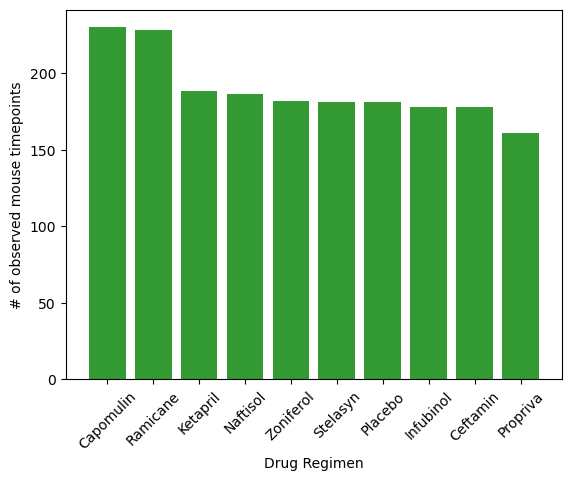

In [343]:


drug_regimen = ["Capomulin", "Ramicane", "Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo",
                "Infubinol","Ceftamin","Propriva"]    
ob_mt = [230,228,188,186,182,181,181,178,178,161]
x_axis = range(len(ob_mt))

plt.bar(x_axis,ob_mt,color='g',alpha=0.8,align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=drug_regimen, rotation=45, fontsize=10)

plt.xlim(-0.90,len(x_axis)-0.10)
plt.ylabel("# of observed mouse timepoints")
plt.xlabel("Drug Regimen")

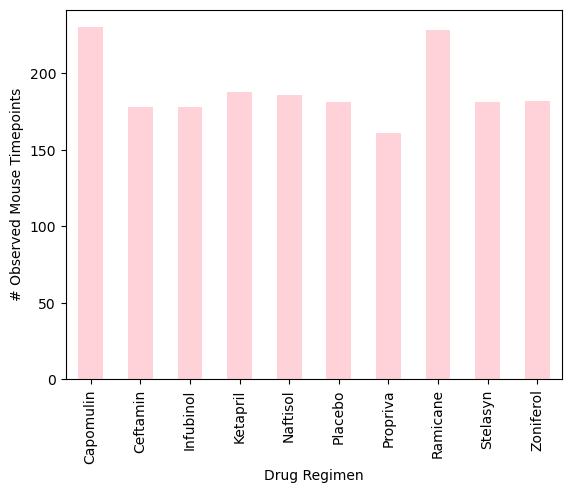

In [344]:

dr = pharm_combine.groupby("Drug Regimen")["Mouse ID"].count()
dr.plot(kind="bar", color="Pink", alpha=0.7)


plt.ylabel("# Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

In [345]:
tsum = pharm_combine["Sex"].value_counts()
tsum

Male      958
Female    935
Name: Sex, dtype: int64

<Figure size 600x600 with 0 Axes>

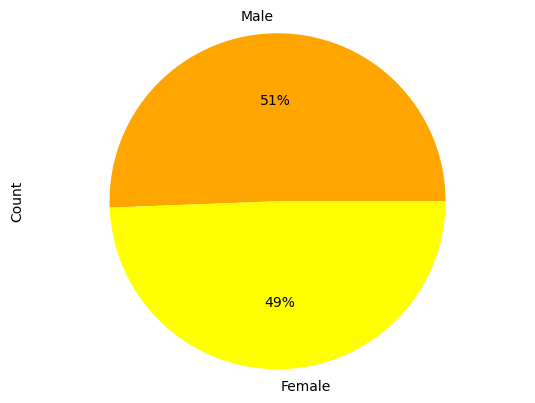

In [346]:

data = {'Sex': ['Male', 'Female'], 'Count': [958, 935]}
pf = pd.DataFrame(data)
plt.figure(figsize=(6, 6))
data_sec.plot(kind='pie', y='Count', labels=pf['Sex'], autopct='%1.0f%%',
        colors=['orange', 'yellow'], startangle=360, legend=False)

plt.axis("equal")
plt.show()

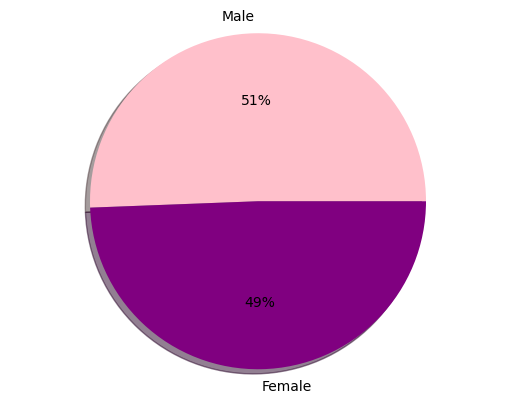

In [347]:

labels = ["Male", "Female",]
sizes = [958,935]
colors = ["pink", "purple"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels,colors=colors,
       autopct="%1.0f%%", shadow=True, startangle=360)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [348]:
regimens_cric = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fil_df = pharm_combine[pharm_combine["Drug Regimen"].isin(regimens_cric)]

great_df = fil_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

final_tv = pd.merge(great_df, filtered_df, on=["Mouse ID", "Timepoint"])

In [349]:
tumor_vol_data = []

for regimen in regimens_cric:
    r_df = final_tv[final_tv["Drug Regimen"] == regimen]

    
    tv = r_df["Tumor Volume (mm3)"]

   
    quartiles = tv.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

   
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    
    potential_outliers = r_df[
        (r_df["Tumor Volume (mm3)"] < lower_bound) |
        (r_df["Tumor Volume (mm3)"] > upper_bound)]

  
    tumor_vol_data.append(tv)

 
    print(f"regimen: {regimen}")
    print(f"lower quartile: {lower_quartile}")
    print(f"upper quartile: {upper_quartile}")
    print(f"iqr: {iqr}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    if not potential_outliers.empty:
        print(f"potential outliers:")
        print(potential_outliers)
    else:
        print("no outliers")
    print("\n")

regimen: Capomulin
lower quartile: 32.37735684
upper quartile: 40.1592203
iqr: 7.781863460000004
lower bound: 20.70456164999999
upper bound: 51.83201549
no outliers


regimen: Ramicane
lower quartile: 31.56046955
upper quartile: 40.65900627
iqr: 9.098536719999998
lower bound: 17.912664470000003
upper bound: 54.30681135
no outliers


regimen: Infubinol
lower quartile: 54.04860769
upper quartile: 65.52574285
iqr: 11.477135160000003
lower bound: 36.83290494999999
upper bound: 82.74144559000001
potential outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  


regimen: Ceftamin
lower quartile: 48.72207785
upper quartile: 64.29983003
iqr: 15.577752179999997
lower bound: 25.355449580000002
upper bound: 87.66645829999999
no outliers




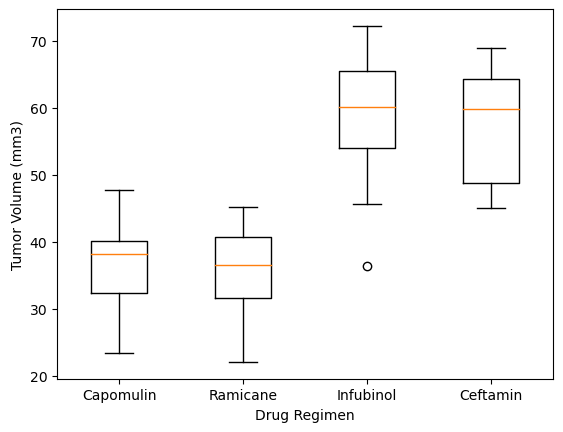

In [350]:
plt.boxplot(tumor_vol_data, labels=regimens_cric)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

In [351]:
spec_m_targ = 'v923'
spec_drug_regimen = 'Capomulin'

mouse_c = pharm_combine[(pharm_combine['Mouse ID'] == spec_m_targ) & 
                        (pharm_combine['Drug Regimen'] == spec_drug_regimen)]

timepoints = mouse_c['Timepoint']
tumor_volume_mc = mouse_c['Tumor Volume (mm3)']

<function matplotlib.pyplot.show(close=None, block=None)>

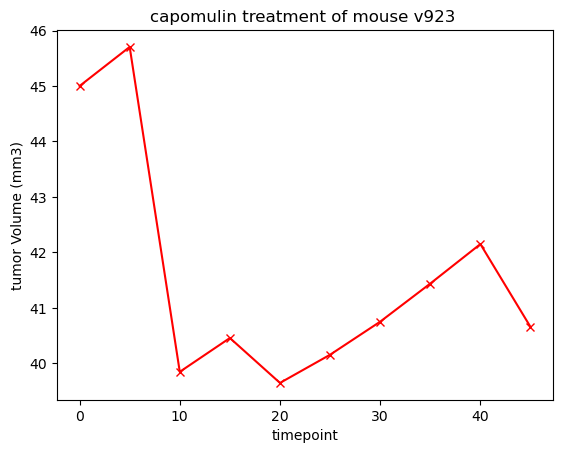

<Figure size 600x600 with 0 Axes>

In [352]:
plt.plot(timepoints, tumor_volume_mc, marker='x', linestyle='-', color='r')
plt.ylabel("tumor Volume (mm3)")
plt.xlabel("timepoint")
plt.title("capomulin treatment of mouse v923 ")
plt.figure(figsize=(6, 6))
plt.show

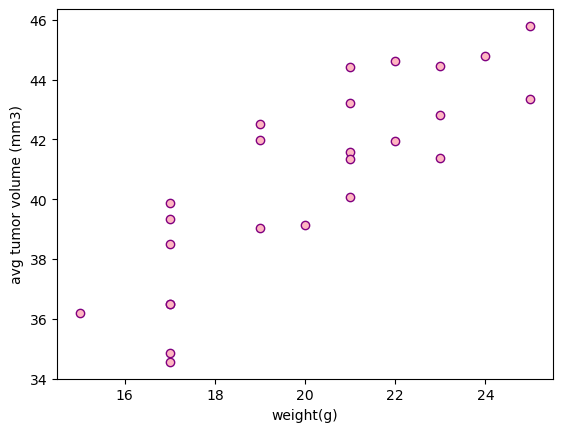

In [353]:
chosen_capo = pharm_combine[pharm_combine['Drug Regimen'] == 'Capomulin']
mandw = chosen_capo.groupby('Mouse ID').agg({"Tumor Volume (mm3)": 'mean', 
                                            "Weight (g)": 'first'}).reset_index()
weights = mandw["Weight (g)"]
avg_tvm = mandw["Tumor Volume (mm3)"]

plt.scatter(weights, avg_tvm, marker = "o", facecolors ="lightpink", edgecolors="purple")

plt.ylabel("avg tumor volume (mm3)")
plt.xlabel("weight(g)")
plt.show()

## Correlation and Regression

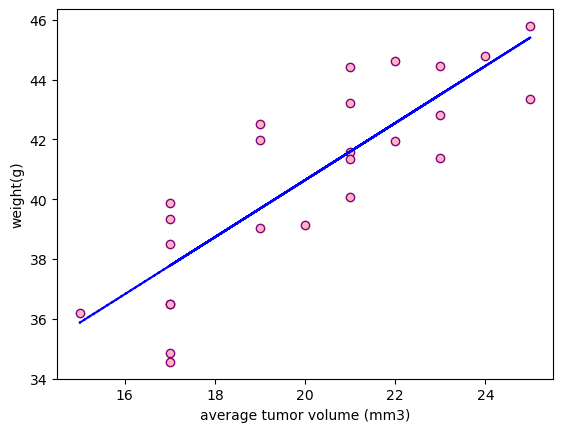

In [354]:
mandw = chosen_capo.groupby('Mouse ID').agg({"Tumor Volume (mm3)": 'mean', 
                                            "Weight (g)": 'first'}).reset_index()
weights = mandw["Weight (g)"]
avg_tvm = mandw["Tumor Volume (mm3)"]

mean_weight = weights.mean()
mean_avg_tvm = avg_tvm.mean()

delta_weights = weights - mean_weight
delta_avg_tvm = avg_tvm - mean_avg_tvm

slope = (delta_weights * delta_avg_tvm).sum() / (delta_weights ** 2).sum()
intercept = mean_avg_tvm - slope * mean_weight

regression = slope * weights + intercept

cc = (delta_weights * delta_avg_tvm).sum() / ((delta_weights**2).sum() * (delta_avg_tvm**2).sum()) ** 0.5


plt.scatter(weights, avg_tvm, marker="o", facecolors="lightpink", edgecolors="purple")
plt.plot(weights, regression_line, color='b', linestyle='--')

plt.xlabel('average tumor volume (mm3)')
plt.ylabel('weight(g)')
plt.show()